# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
#To get data in API for both current weather and forecast in Fahrenheit just add units=imperial 
units = "imperial"
params = {
    "appid": weather_api_key,
    "units": units
}

# cities = ["Paris","London"] #, "London", "Oslo", "Beijing"]
#Create List to host the JSON Data
city_name = []
cloudiness_data = []
country_data = []
date_data = []
humidity_data = []
lat_data = []
lng_data = []
max_temp_data = []
wind_speed_data = []

#Setup initial values
record_count = 1
set_count = 1

print("Beginning Data Retrieval")     
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try: 
        params["q"] = city
        response = requests.get(url, params=params).json()
        print(f"Processing Record {record_count} of set {set_count} | {city.title()}")
        city_name.append(response["name"])
        cloudiness_data.append(response['clouds']['all'])
        country_data.append(response['sys']['country'])
        date_data.append(response['dt'])
        humidity_data.append(response['main']['humidity'])
        lat_data.append(response['coord']['lat'])
        lng_data.append(response['coord']['lon'])
        max_temp_data.append(response['main']['temp_max'])
        wind_speed_data.append(response['wind']['speed'])
        #time.sleep(1.01)
    except:
        print("City not found. Skipping...")

    record_count = record_count +1 
    if record_count == 51:
        record_count = 1
        set_count +=1

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | Beloha
Processing Record 2 of set 1 | Payo
Processing Record 3 of set 1 | New Norfolk
Processing Record 4 of set 1 | Port Elizabeth
Processing Record 5 of set 1 | Ternate
Processing Record 6 of set 1 | Kodiak
Processing Record 7 of set 1 | San Antonio
Processing Record 8 of set 1 | Guanajuato
Processing Record 9 of set 1 | Torbay
Processing Record 10 of set 1 | Hobart
Processing Record 11 of set 1 | Xichang
Processing Record 12 of set 1 | Baykit
Processing Record 13 of set 1 | Sao Filipe
Processing Record 14 of set 1 | Ushuaia
Processing Record 15 of set 1 | Ribeira Grande
Processing Record 16 of set 1 | Kavieng
Processing Record 17 of set 1 | Thompson
Processing Record 18 of set 1 | Cape Town
Processing Record 19 of set 1 | Turan
Processing Record 20 of set 1 | Butaritari
Processing Record 21 of set 1 | Srandakan
Processing Record 22 of set 1 | Puerto Ayora
Processing Record 23 of set 1 | Tabiauea
Ci

Processing Record 36 of set 4 | Carlisle
Processing Record 37 of set 4 | Cravo Norte
Processing Record 38 of set 4 | Samarai
Processing Record 39 of set 4 | Yining
Processing Record 40 of set 4 | Tuktoyaktuk
Processing Record 41 of set 4 | Nalut
Processing Record 42 of set 4 | Virginia Beach
Processing Record 43 of set 4 | Lompoc
Processing Record 44 of set 4 | Bathurst
Processing Record 45 of set 4 | Elko
Processing Record 46 of set 4 | Guerrero Negro
Processing Record 47 of set 4 | Sur
Processing Record 48 of set 4 | Chipiona
Processing Record 49 of set 4 | Denpasar
Processing Record 50 of set 4 | Bredasdorp
Processing Record 1 of set 5 | Zharkent
Processing Record 2 of set 5 | Vagur
Processing Record 3 of set 5 | Buala
Processing Record 4 of set 5 | Schrobenhausen
Processing Record 5 of set 5 | Barrow
Processing Record 6 of set 5 | Huambo
Processing Record 7 of set 5 | Opuwo
Processing Record 8 of set 5 | Pangai
Processing Record 9 of set 5 | Tuatapere
Processing Record 10 of set 5 

Processing Record 24 of set 8 | Singaparna
Processing Record 25 of set 8 | Karratha
Processing Record 26 of set 8 | Akyab
City not found. Skipping...
Processing Record 27 of set 8 | Wewak
Processing Record 28 of set 8 | Cidreira
Processing Record 29 of set 8 | Rungata
City not found. Skipping...
Processing Record 30 of set 8 | Alofi
Processing Record 31 of set 8 | Shangzhi
Processing Record 32 of set 8 | Srivardhan
Processing Record 33 of set 8 | Margate
Processing Record 34 of set 8 | Turukhansk
Processing Record 35 of set 8 | Brunsbuttel
Processing Record 36 of set 8 | Pizarro
Processing Record 37 of set 8 | Trairi
Processing Record 38 of set 8 | Mutsamudu
City not found. Skipping...
Processing Record 39 of set 8 | Nevel
Processing Record 40 of set 8 | Xiongyue
Processing Record 41 of set 8 | Meyungs
City not found. Skipping...
Processing Record 42 of set 8 | Sorvag
City not found. Skipping...
Processing Record 43 of set 8 | Khatanga
Processing Record 44 of set 8 | Almaznyy
Processin

Processing Record 5 of set 12 | Sinnamary
Processing Record 6 of set 12 | Chalisgaon
Processing Record 7 of set 12 | Gibara
Processing Record 8 of set 12 | Labuhan
Processing Record 9 of set 12 | Cayenne
Processing Record 10 of set 12 | Anloga
Processing Record 11 of set 12 | Broken Hill
Processing Record 12 of set 12 | Yuncheng
Processing Record 13 of set 12 | Antofagasta
Processing Record 14 of set 12 | La Ronge
Processing Record 15 of set 12 | Am Timan
Processing Record 16 of set 12 | Sakakah
City not found. Skipping...
Processing Record 17 of set 12 | Havelock
Processing Record 18 of set 12 | Tabialan
City not found. Skipping...
Processing Record 19 of set 12 | Scottsbluff
Processing Record 20 of set 12 | Carnot
Processing Record 21 of set 12 | Monroe
Processing Record 22 of set 12 | Granada
Processing Record 23 of set 12 | Kimbe
Processing Record 24 of set 12 | Dunedin
Processing Record 25 of set 12 | Port Moresby
Processing Record 26 of set 12 | Cabedelo
Processing Record 27 of s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness_data,
    "Country": country_data,
    "Date": date_data,
    "Humidity": humidity_data,
    "Lat": lat_data,
    "Lng": lng_data,
    "Max Temp": max_temp_data,
    "Wind Speed": wind_speed_data
}

weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Beloha,98,MG,1570871370,42,-25.17,45.06,85.69,8.71
1,Payo,100,ID,1570871370,37,-3.75,103.64,86.61,5.90
2,New Norfolk,20,AU,1570871370,57,-42.78,147.06,50.00,9.17
3,Port Elizabeth,1,US,1570871371,87,39.31,-74.98,57.99,3.36
4,Ternate,20,PH,1570871371,70,14.29,120.72,88.00,11.41


In [6]:
#Check the summary statistics
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,555.000000,5.550000e+02,555.000000,555.000000,555.000000,555.000000,555.000000
mean,54.349550,1.570871e+09,70.390991,20.033009,22.697874,60.909640,8.103027
std,39.645181,5.074131e+01,21.452245,34.000571,89.724444,20.310042,5.170387
min,0.000000,1.570871e+09,6.000000,-54.810000,-179.170000,9.730000,0.600000
25%,8.500000,1.570871e+09,58.000000,-8.915000,-57.355000,45.000000,4.535000
50%,68.000000,1.570871e+09,76.000000,22.570000,26.830000,64.990000,6.930000
75%,94.000000,1.570872e+09,87.000000,50.165000,102.600000,78.170000,10.895000
max,100.000000,1.570872e+09,100.000000,78.220000,179.320000,102.200000,29.970000


In [7]:
#Save the data to csv file
weather_df.to_csv(output_data_file, index=False)

In [8]:
# weather_df = pd.read_csv(output_data_file)
# weather_df.count()


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

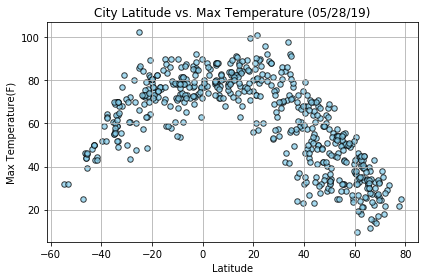

In [9]:
#Build scatter plot for Latitude vs. Temperature
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker="o", facecolors="skyblue", edgecolors="black", s=30, alpha=0.75)

# Set a title for the chart
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.grid()
plt.tight_layout()
plt.savefig("Images/LatTemp.png")
plt.show()


#### Latitude vs. Humidity Plot

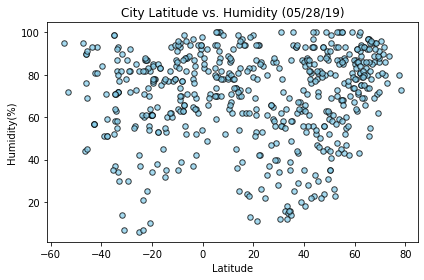

In [18]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'],marker="o", facecolors="skyblue", edgecolors="black", s=30, alpha=0.75)

# Set a title for the chart
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("Images/Humidity.png")
plt.tight_layout()
plt.show()

#### Latitude vs. Cloudiness Plot

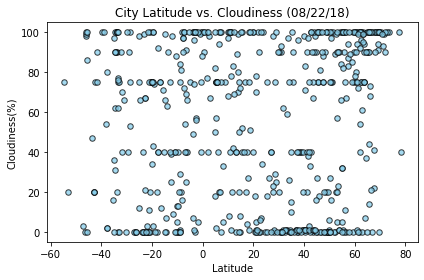

In [20]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'],marker="o", facecolors="skyblue", edgecolors="black", s=30, alpha=0.75)
# Set a title for the chart
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("Images/Cloudiness.png")
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

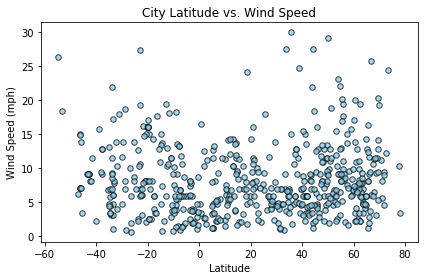

In [22]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'],marker="o", facecolors="skyblue", edgecolors="black", s=30, alpha=0.75)
# Set a title for the chart
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/Cloudiness.png")
plt.tight_layout()
plt.show()

## Linear Regression

In [24]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Beloha,98,MG,1570871370,42,-25.17,45.06,85.69,8.71
1,Payo,100,ID,1570871370,37,-3.75,103.64,86.61,5.90
2,New Norfolk,20,AU,1570871370,57,-42.78,147.06,50.00,9.17
3,Port Elizabeth,1,US,1570871371,87,39.31,-74.98,57.99,3.36
4,Ternate,20,PH,1570871371,70,14.29,120.72,88.00,11.41


In [25]:
northern_df = weather_df[weather_df['Lat'] > 0]
northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
3,Port Elizabeth,1,US,1570871371,87,39.31,-74.98,57.99,3.36
4,Ternate,20,PH,1570871371,70,14.29,120.72,88.00,11.41
5,Kodiak,1,US,1570871371,86,39.95,-94.76,32.00,6.93
7,Guanajuato,70,MX,1570871372,87,21.02,-101.25,60.01,7.91
8,Torbay,75,CA,1570871374,93,47.66,-52.73,42.01,8.05


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [29]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']

# OPTIONAL: Create a function to create Linear Regression plots
# Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

The r-squared is: -0.8377228766931479


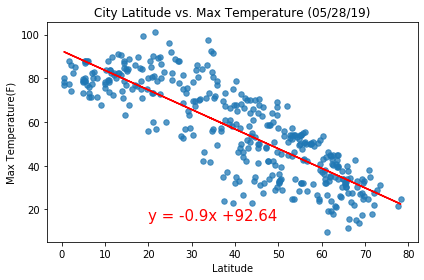

In [30]:
plt.scatter(northern_df['Lat'], northern_df['Max Temp'], s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
# Set a title for the chart
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/LatitudeVsMaxTemp.png")
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7003885681672967


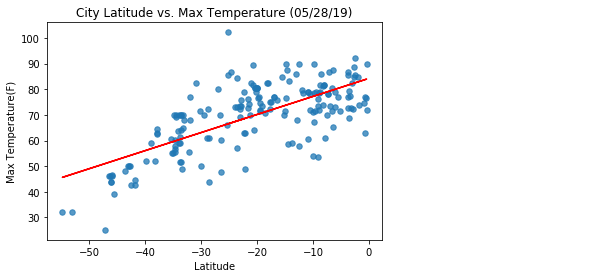

<Figure size 432x288 with 0 Axes>

In [41]:
southern_df = weather_df[weather_df['Lat'] <= 0]
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']

# Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Print r square value
print(f"The r-squared is: {rvalue}")


plt.scatter(x_values, y_values, s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.savefig("Images/Temp_Lat.png")
plt.show()
plt.tight_layout()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11881984549987122


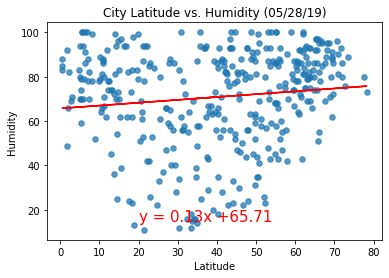

<Figure size 432x288 with 0 Axes>

In [42]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']

# Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Print r square value
print(f"The r-squared is: {rvalue}")

plt.scatter(x_values, y_values, s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.savefig("Images/Humidy_Lat.png")
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11181126888041672


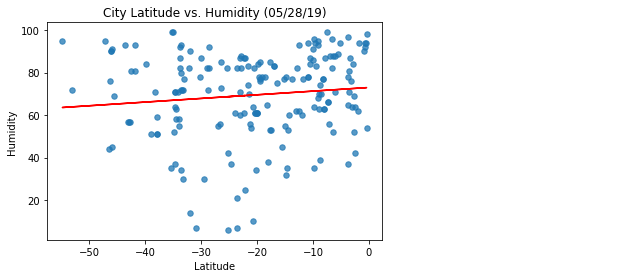

<Figure size 432x288 with 0 Axes>

In [43]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']

# Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Print r square value
print(f"The r-squared is: {rvalue}")

plt.scatter(x_values, y_values, s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Images/Lat_Humid.png")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.show()
plt.tight_layout()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1477981402686746


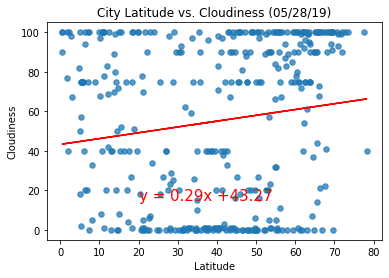

<Figure size 432x288 with 0 Axes>

In [44]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']

# Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Print r square value
print(f"The r-squared is: {rvalue}")

plt.scatter(x_values, y_values, s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.title("City Latitude vs. Cloudiness (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.savefig("Images/Lat_Cloud.png")
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00815154919593276


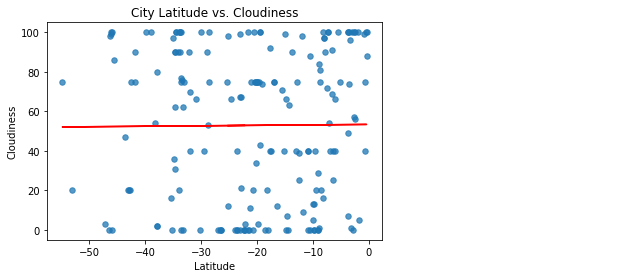

<Figure size 432x288 with 0 Axes>

In [45]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']

# Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Print r square value
print(f"The r-squared is: {rvalue}")

plt.scatter(x_values, y_values, s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.savefig("Images/Cloudy_Lat.png")
plt.show()
plt.tight_layout()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1614883778077193


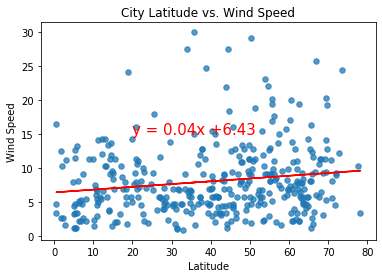

<Figure size 432x288 with 0 Axes>

In [46]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']

# Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Print r square value
print(f"The r-squared is: {rvalue}")

plt.scatter(x_values, y_values, s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.savefig("Images/LatWind.png")
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.27542367533820045


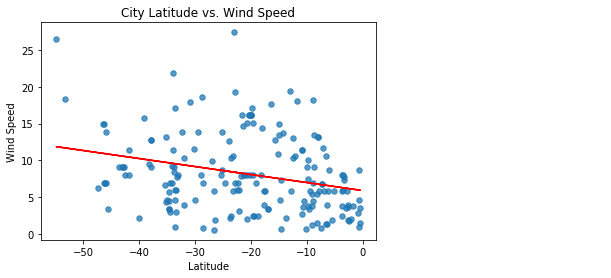

<Figure size 432x288 with 0 Axes>

In [47]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']

# Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Print r square value
print(f"The r-squared is: {rvalue}")

plt.scatter(x_values, y_values, s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.savefig("Images/Lat_WindSpeed.png")
plt.show()
plt.tight_layout()